In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000, random_state=42)

In [5]:
import time
from sklearn.ensemble import RandomForestClassifier

t1 = time.time()
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
t0 = time.time()
print('Training took {:.2f}s'.format(t0-t1))

Training took 12.16s


In [6]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9674

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_train_reduced = pca.fit_transform(X_train)

In [8]:
t1 = time.time()
rfc.fit(X_train_reduced,y_train)
t0 = time.time()
print('Training took {:.2f}s'.format(t0-t1))

Training took 23.06s


In [9]:
X_test_reduced = pca.transform(X_test)
y_pred = rfc.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9469

PCA sucked for this model, it increased training time and severely crippled performance

### Exercise 10

In [14]:
import numpy as np

np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = X[idx]
y = y[idx]

In [28]:
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding
import matplotlib.pyplot as plt
import matplotlib as mpl

tsne = TSNE(n_jobs=-1, random_state=42)
mds = MDS(n_jobs=-1, random_state=42)
lle = LocallyLinearEmbedding(n_jobs=-1, random_state=42)

In [29]:
X_reduced = tsne.fit_transform(X)

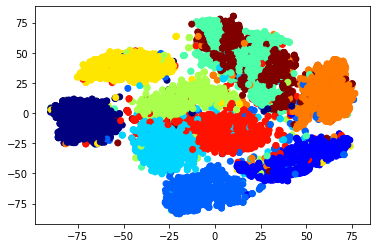

In [41]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y.reshape(len(y),1),cmap='jet')

In [27]:
y

array(['7', '3', '8', ..., '9', '8', '1'], dtype=object)

In [35]:
y:0]

SyntaxError: unmatched ']' (<ipython-input-35-8b38c8677fec>, line 1)

In [39]:
y.reshape(len(y),1)

array([['7'],
       ['3'],
       ['8'],
       ...,
       ['9'],
       ['8'],
       ['1']], dtype=object)